# **Set up Kaggle credentials and permissions**

# **Load the CSV into pandas**

In [21]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('hypothyroid.csv')
df.head()



Saving hypothyroid.csv to hypothyroid (1).csv


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# **Preprocessing**

In [22]:

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for missing values
missing = df.isnull().sum()

# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

# Encode categorical and boolean columns
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype('category').cat.codes


In [23]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,referral_source,binaryclass
0,34,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,1
1,15,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,1
2,40,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,1
3,67,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,1
4,67,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,1,0,0,0,0,0,0,0,0,...,0,241,0,146,0,234,0,0,4,1
3768,64,1,0,0,0,0,0,0,0,0,...,1,27,1,66,1,16,0,0,3,1
3769,71,1,0,0,0,0,0,0,0,0,...,1,14,1,65,1,6,0,0,4,1
3770,69,2,0,0,0,0,0,0,0,0,...,1,222,1,51,1,219,0,0,3,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int8 
 1   sex                        3772 non-null   int8 
 2   on_thyroxine               3772 non-null   int8 
 3   query_on_thyroxine         3772 non-null   int8 
 4   on_antithyroid_medication  3772 non-null   int8 
 5   sick                       3772 non-null   int8 
 6   pregnant                   3772 non-null   int8 
 7   thyroid_surgery            3772 non-null   int8 
 8   i131_treatment             3772 non-null   int8 
 9   query_hypothyroid          3772 non-null   int8 
 10  query_hyperthyroid         3772 non-null   int8 
 11  lithium                    3772 non-null   int8 
 12  goitre                     3772 non-null   int8 
 13  tumor                      3772 non-null   int8 
 14  hypopituitary           

In [25]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,i131_treatment,query_hypothyroid,...,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,referral_source,binaryclass
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.0,3772.0,3772.000000,3772.000000
mean,46.353924,1.262990,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.938759,121.097296,0.897402,66.144486,0.897932,110.733563,0.0,0.0,3.279427,0.922853
std,20.843843,0.522908,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.239803,98.638463,0.303473,32.692626,0.302778,97.524103,0.0,0.0,1.092085,0.266861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,23.000000,1.000000,46.000000,1.000000,17.000000,0.0,0.0,3.000000,1.000000
50%,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,85.000000,1.000000,58.000000,1.000000,58.000000,0.0,0.0,4.000000,1.000000
75%,63.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,226.000000,1.000000,72.000000,1.000000,224.000000,0.0,0.0,4.000000,1.000000
max,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,241.000000,1.000000,146.000000,1.000000,234.000000,0.0,0.0,4.000000,1.000000


In [26]:
# Count missing values for each column
missing_values_count = df.isnull().sum()


In [27]:
missing_values_count

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
i131_treatment,0
query_hypothyroid,0


# **Exploratry Data Analysis**

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-29-945708703>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binaryclass', data=df, palette='Set2')


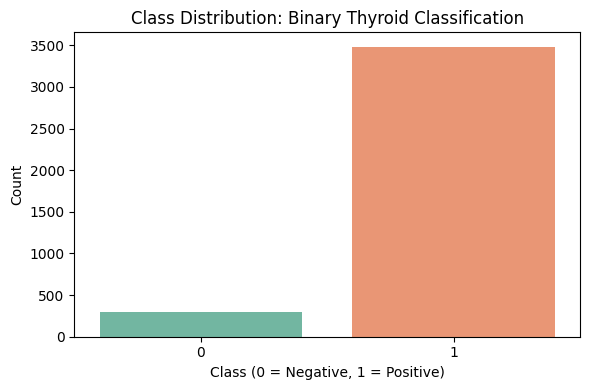

In [29]:
# Class distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x='binaryclass', data=df, palette='Set2')
plt.title("Class Distribution: Binary Thyroid Classification")
plt.xlabel("Class (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

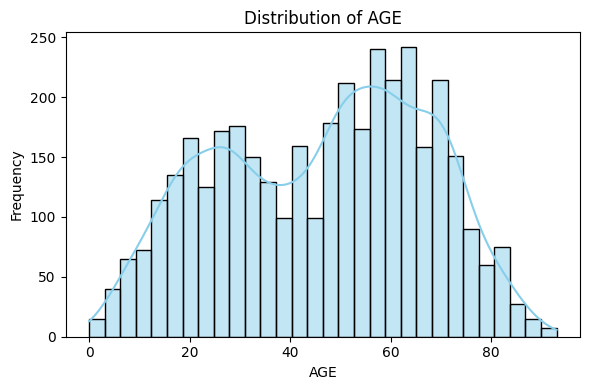

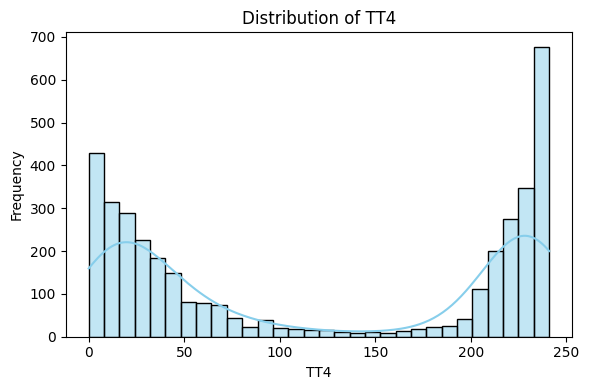

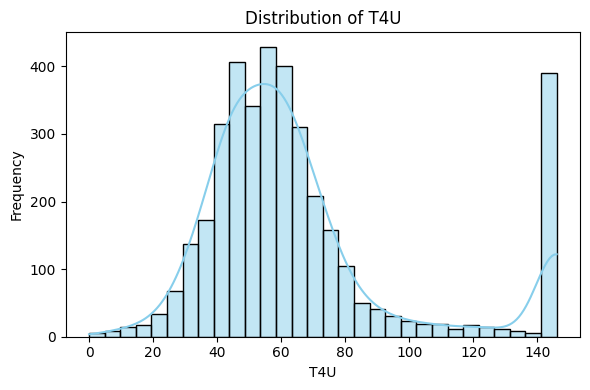

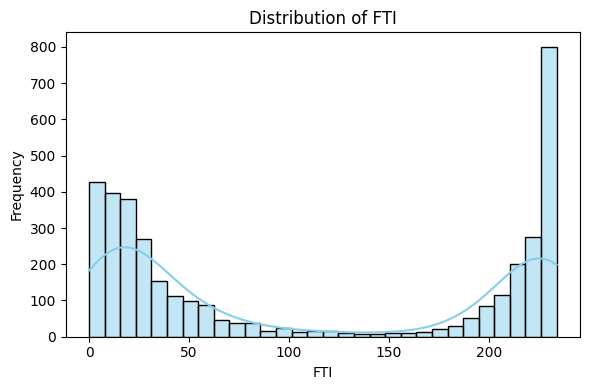

In [30]:

# Histograms of selected features
selected_features = ['age', 'tt4', 't4u', 'fti']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {feature.upper()}")
    plt.xlabel(feature.upper())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

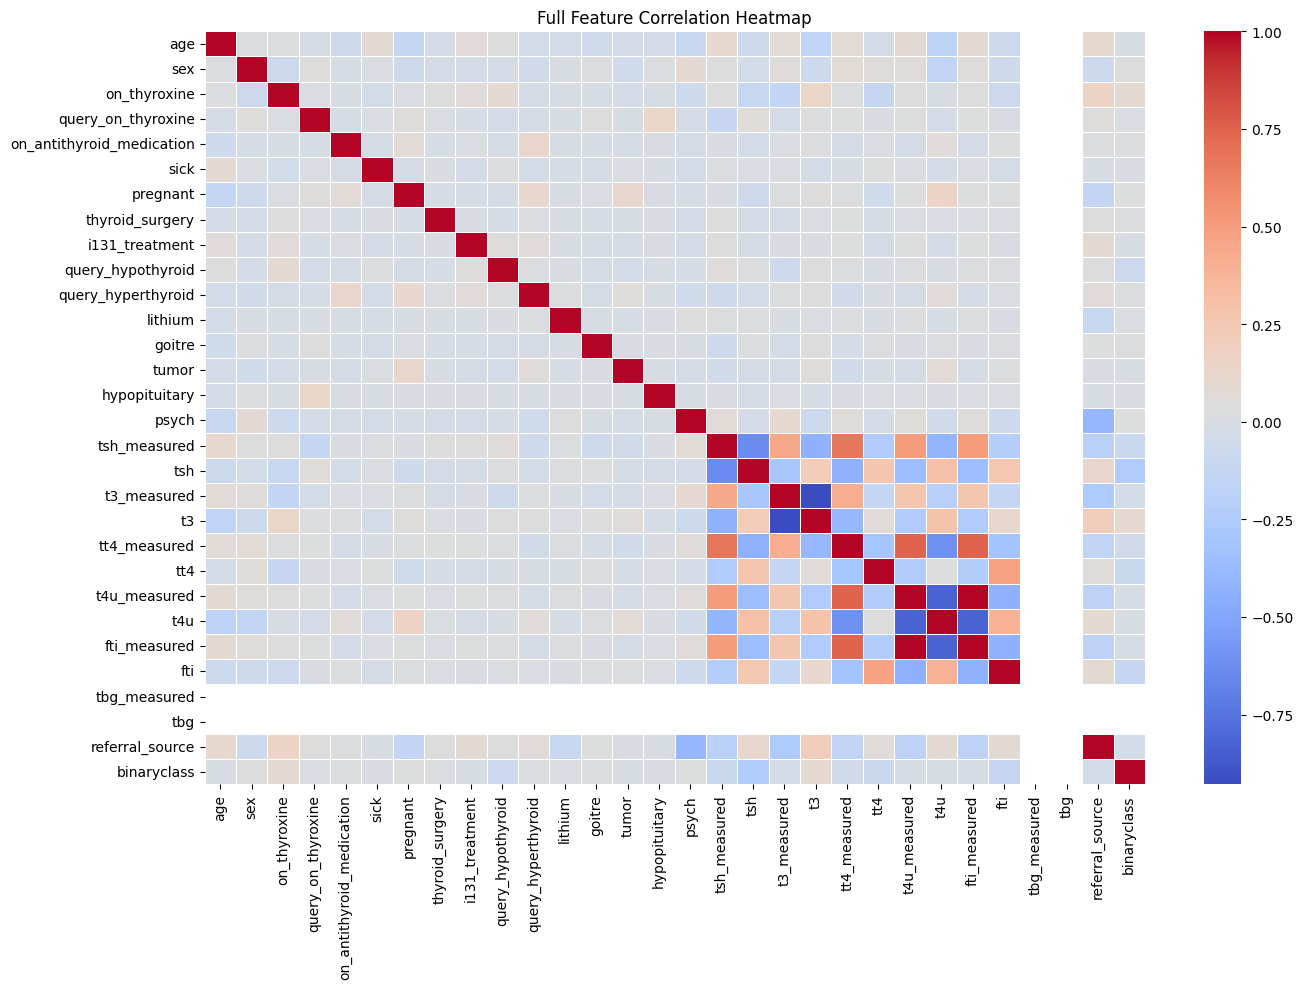

In [31]:
# Correlation heatmap for top features
plt.figure(figsize=(14, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Full Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

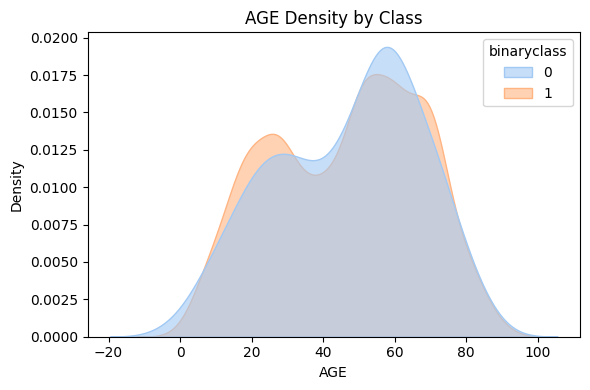

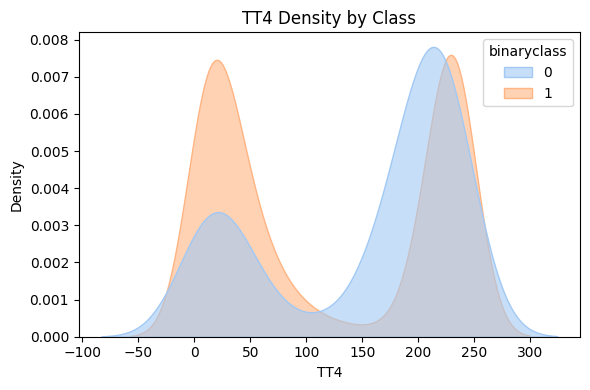

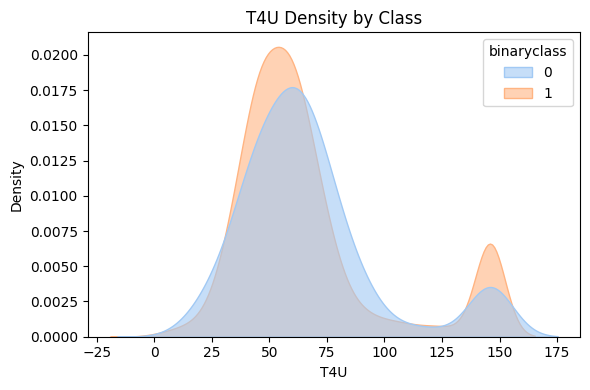

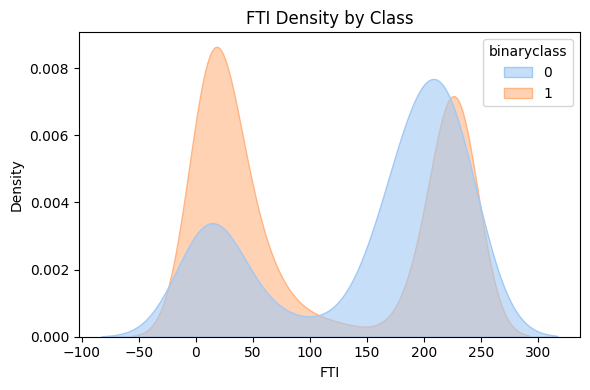

In [32]:


# Plot class-wise density plots for selected numeric features
selected_features = ['age', 'tt4', 't4u', 'fti']

# Plotting density plots for each selected feature split by class
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='binaryclass', fill=True, common_norm=False, palette='pastel', alpha=0.6)
    plt.title(f"{feature.upper()} Density by Class")
    plt.xlabel(feature.upper())
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

